# Import Libraries

In [2]:
import pandas as pd
import numpy as np


In [4]:
train_data = pd.read_csv('/Users/vishal/Desktop/CSV files/Bagging_carinsurance_train.csv')
test_data = pd.read_csv('/Users/vishal/Desktop/CSV files/Bagging_carinsurance_test.csv')

# Train data



In [6]:
train_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [12]:
train_data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

# Test data

In [8]:
test_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Job               995 non-null    object 
 3   Marital           1000 non-null   object 
 4   Education         953 non-null    object 
 5   Default           1000 non-null   int64  
 6   Balance           1000 non-null   int64  
 7   HHInsurance       1000 non-null   int64  
 8   CarLoan           1000 non-null   int64  
 9   Communication     779 non-null    object 
 10  LastContactDay    1000 non-null   int64  
 11  LastContactMonth  1000 non-null   object 
 12  NoOfContacts      1000 non-null   int64  
 13  DaysPassed        1000 non-null   int64  
 14  PrevAttempts      1000 non-null   int64  
 15  Outcome           243 non-null    object 
 16  CallStart         1000 non-null   object 
 

In [22]:
test_data.isnull().sum()

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [24]:
print(train_data.columns)
print(test_data.columns)


Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')
Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')


# Handle Missing Values

In [27]:
from sklearn.impute import SimpleImputer

# Handle missing values for relevant columns
imputer = SimpleImputer(strategy='most_frequent')
for column in ['Job', 'Education', 'Communication', 'Outcome']:
    train_data[column] = imputer.fit_transform(train_data[[column]]).ravel()
    test_data[column] = imputer.transform(test_data[[column]]).ravel()


# Convert Time Columns to Seconds

def convert_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

train_data['CallStart'] = train_data['CallStart'].apply(convert_to_seconds)
train_data['CallEnd'] = train_data['CallEnd'].apply(convert_to_seconds)
test_data['CallStart'] = test_data['CallStart'].apply(convert_to_seconds)
test_data['CallEnd'] = test_data['CallEnd'].apply(convert_to_seconds)


# Encode Categorical Variables

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical column
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoders[column].transform(test_data[column])


# Define Feature Columns and Target Column

In [40]:
# Define the feature columns and the target column
feature_columns = [col for col in train_data.columns if col != 'CarInsurance']
X_train = train_data[feature_columns]
y_train = train_data['CarInsurance']
X_test = test_data[feature_columns]


# Splitting the Data

In [43]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Building and Training Models

## 1. XGBoost Model Training

In [80]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 109.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [82]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# 2. GBM Model Training

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the GBM model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# Model Evaluation

# 1. Evaluate XGBoost Model

In [84]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_pred_val_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_val_xgb)
report_xgb = classification_report(y_val, y_pred_val_xgb)

print(f'XGBoost Validation Accuracy: {accuracy_xgb}')
print('XGBoost Classification Report:')
print(report_xgb)


XGBoost Validation Accuracy: 0.745
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       484
           1       0.72      0.58      0.64       316

    accuracy                           0.74       800
   macro avg       0.74      0.72      0.72       800
weighted avg       0.74      0.74      0.74       800



# 2. Evaluate GBM Model 

In [59]:
# Make predictions on the validation set
y_pred_val_gbm = gbm_model.predict(X_val)

# Evaluate the model
accuracy_gbm = accuracy_score(y_val, y_pred_val_gbm)
report_gbm = classification_report(y_val, y_pred_val_gbm)

print(f'GBM Validation Accuracy: {accuracy_gbm}')
print('GBM Classification Report:')
print(report_gbm)


GBM Validation Accuracy: 0.73125
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       484
           1       0.76      0.47      0.58       316

    accuracy                           0.73       800
   macro avg       0.74      0.69      0.69       800
weighted avg       0.74      0.73      0.71       800



# Making Predictions on Test Data 

## 1. Make Predictions using XGBoost

In [86]:
# Make predictions on the test dataset using XGBoost
y_pred_test_xgb = xgb_model.predict(X_test)


## 2. Make Predictions using GBM

In [65]:
# Make predictions on the test dataset using GBM
y_pred_test_gbm = gbm_model.predict(X_test)


# Plotting the Results

## 1. Plot Predictions from XGBoost

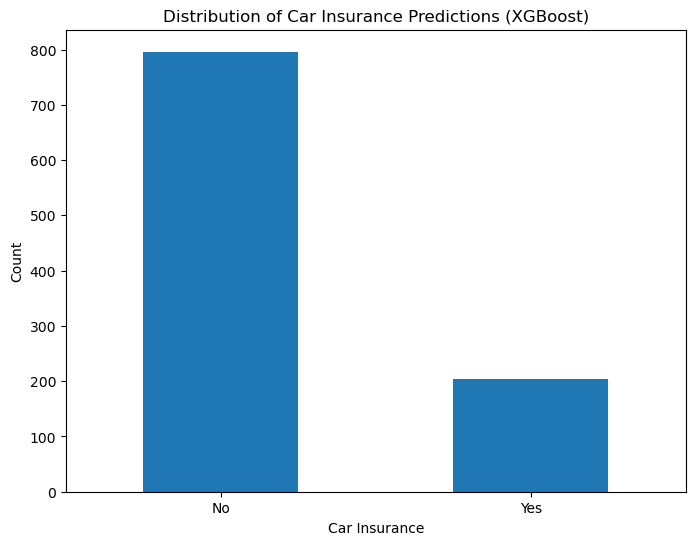

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to display the predictions using the index
predictions_xgb = pd.DataFrame({'Index': test_data.index, 'CarInsurance': y_pred_test_xgb})

# Plot the distribution of predictions
plt.figure(figsize=(8, 6))
predictions_xgb['CarInsurance'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Insurance Predictions (XGBoost)')
plt.xlabel('Car Insurance')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


##  2. Plot Predictions from GBM

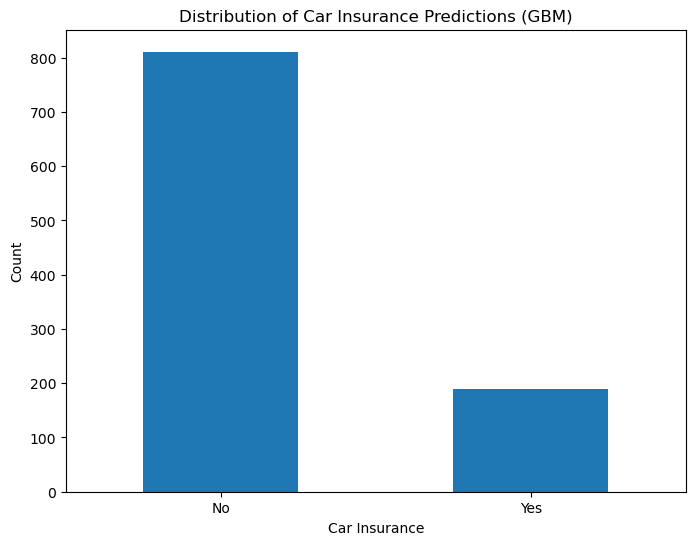

In [74]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the predictions using the index
predictions_gbm = pd.DataFrame({'Index': test_data.index, 'CarInsurance': y_pred_test_gbm})

# Plot the distribution of predictions
plt.figure(figsize=(8, 6))
predictions_gbm['CarInsurance'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Insurance Predictions (GBM)')
plt.xlabel('Car Insurance')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()
